In [1]:
import arcpy

In [2]:
# Input database
# for future use: edit "ky_small_scale"
inputDB = 'c:\\SchimpffGIS\\data\\ky_small_scale.gdb'

# Create string representing output locations
myData = 'c:\\SchimpffGIS\\data'
myDB = 'bluegrass_crops.gdb'
outputDB = f'{myData}\\{myDB}'

# Verify
print(f'Input: {inputDB} Output: {outputDB}')

# AOI in input database
# for future use: edit 'state_polygon'
aoi = 'state_polygon'

Input: c:\SchimpffGIS\data\ky_small_scale.gdb Output: c:\SchimpffGIS\data\bluegrass_crops.gdb


In [5]:
# Input database
# for future use: edit env.workspace location
arcpy.env.workspace = 'c:\\SchimpffGIS\\data\\ky_small_scale.gdb'
# Define output CRS
ky = arcpy.SpatialReference(3089)
# Set the output CRS
arcpy.env.outputCoordinateSystem = ky
# CRS is WGS84
wgs84 = arcpy.SpatialReference(4326)
# Enable overwriting exist layers
arcpy.env.overwriteOutput = True

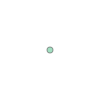

In [6]:
# set the location of the intersection at Main and Limestone
lat = 38.046372
lon = -84.497024
# create point
point = arcpy.Point(lon, lat)
# create point geometry using wgs84
ptGeometry = arcpy.PointGeometry(point, wgs84)
# show that bad boy below
ptGeometry

In [7]:
# there he is ^^
# save the point to a feature class in workspace
arcpy.management.CopyFeatures(ptGeometry, "downtownLex")


<Result 'c:\\SchimpffGIS\\data\\ky_small_scale.gdb\\downtownLex'>

In [8]:
# create a 10-mile buffer around the point, creates a 20mi diameter circular polygon
arcpy.analysis.Buffer("downtownLex", "aoi", "10 mile")

<Result 'c:\\SchimpffGIS\\data\\ky_small_scale.gdb\\aoi'>

In [9]:
# convert circular polygon to square polygon. output name 'aoi_polygon'
arcpy.management.FeatureEnvelopeToPolygon("aoi", "aoi_polygon")

<Result 'c:\\SchimpffGIS\\data\\ky_small_scale.gdb\\aoi_polygon'>

In [10]:
print(outputDB)

c:\SchimpffGIS\data\bluegrass_crops.gdb


In [11]:
# Creating output database
print("Creating workspace geodatabase...")
# Check if it already exists
if arcpy.Exists(outputDB):
    print(f"Output database exists: {outputDB}")
else:
    arcpy.management.CreateFileGDB(myData, myDB)
    print(f"Created output database: {outputDB}")
    
print(f"Using {arcpy.env.workspace} for input data.")

Creating workspace geodatabase...
Created output database: c:\SchimpffGIS\data\bluegrass_crops.gdb
Using c:\SchimpffGIS\data\ky_small_scale.gdb for input data.


In [14]:
aoi_polygon = "aoi_polygon"

In [15]:
# Clip vector layers
# Create a list of feature class names
features = arcpy.ListFeatureClasses()
# Loop over list of features
for feature in features:
    # Make output name
    output = f"{outputDB}\\{feature}"
    # If aoi, then don't clip; copy
    if feature == aoi_polygon:
        arcpy.management.Copy(feature, output)
        print(f"Copying {feature} to {output}")
    else:
        print(f"Clipping {feature} with {aoi} and outputting layer to {output} ...")
        arcpy.analysis.Clip(feature, aoi_polygon, output)

# Clip raster layers
# Create a list of raster names
rasters = arcpy.ListRasters()
# Loop over list of rasters
for raster in rasters:
    output = f"{outputDB}\\{raster}"
    print(f"Clipping {raster} with {aoi} and outputting layer to {output} ...")
    arcpy.management.Clip(raster, "#", output, aoi_polygon, "#", "ClippingGeometry", "#")

Clipping counties with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\counties ...
Clipping gnis with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\gnis ...
Clipping incoporated_places with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\incoporated_places ...
Clipping state_polygon with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\state_polygon ...
Clipping roads with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\roads ...
Clipping streams with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\streams ...
Clipping waterbodies with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\waterbodies ...
Clipping miguels with state_polygon and outputting layer to c:\SchimpffGIS\data\bluegrass_crops.gdb\miguels ...
Clipping one_mi_miguels with state_polygon and outputting layer to c:\

In [16]:
arcpy.env.workspace = outputDB

In [17]:
print(arcpy.env.workspace)

c:\SchimpffGIS\data\bluegrass_crops.gdb


In [18]:
sumCover = 0
with arcpy.da.SearchCursor('NLCD_2016_land_cover', ['Count']) as cursor:
    for row in cursor:
        sumCover += row[0]
with arcpy.da.SearchCursor('NLCD_2016_land_cover', ['Count', 'NLCD_Land_Cover_Class']) as cursor:
    for row in cursor:
        a = (row[0]/sumCover) * 100
        b = (row[0] * 98.4**2) / 2.788e+7
        a = round(a, 2)
        b = round(b, 1)
        c = f'{a}%, {b} sq mi of {row[1]}'
        print(c)

0.42%, 1.7 sq mi of Open Water
9.08%, 36.3 sq mi of Developed, Open Space
7.97%, 31.9 sq mi of Developed, Low Intensity
4.99%, 20.0 sq mi of Developed, Medium Intensity
2.07%, 8.3 sq mi of Developed, High Intensity
0.21%, 0.9 sq mi of Barren Land
5.87%, 23.5 sq mi of Deciduous Forest
0.07%, 0.3 sq mi of Evergreen Forest
1.98%, 7.9 sq mi of Mixed Forest
0.05%, 0.2 sq mi of Shrub/Scrub
0.3%, 1.2 sq mi of Herbaceuous
63.4%, 253.5 sq mi of Hay/Pasture
3.53%, 14.1 sq mi of Cultivated Crops
0.04%, 0.1 sq mi of Woody Wetlands
0.01%, 0.0 sq mi of Emergent Herbaceuous Wetlands


63.4% of Hay/Pasture
24.11% of Developed Area
5.87% of Decidous Forest
3.53% of Cultivated Crops